# 📊 Data Exploration - QM9 Dataset
## Quantum Drug Discovery Project

**Goal**: Understand the QM9 dataset and select target property for prediction

**Contents**:
1. Load and inspect data
2. Visualize molecular structures
3. Analyze target distributions
4. Check for outliers
5. Decision: Which property to predict?

In [17]:
# Imports
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# JAX
import jax.numpy as jnp

# Chemistry
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

# Our loaders
from src.data.loaders import QM9Loader, DataSplitter

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Imports successful")

✅ Imports successful


## 1. Load QM9 Dataset

In [19]:
import os
import sys

# --- FIX: ensure notebook runs from project root ---
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)

print("📁 Working directory set to:", os.getcwd())
print("📦 Loading QM9 dataset...\n")

# --- Now safe to import and load ---
from src.data.loaders import QM9Loader

# Load full QM9 dataset
loader = QM9Loader()

# Load with dipole moment as target (default)
dataset = loader.load(target_property='mu', max_samples=None)

print(f"\n📦 Dataset loaded:")
print(f"   Total molecules: {len(dataset)}")
print(f"   Task type: {dataset.task_type}")
print(f"   Target: {dataset.target_names[0]}")

📁 Working directory set to: /Users/futurediary/Desktop/vs-Stack/Projects/Quantum_ML_for _Drug_Discovery
📦 Loading QM9 dataset...

📦 Loading QM9 dataset (target: mu)...
   Raw data: 133885 molecules
   After cleaning: 133885 molecules

   📊 Target Statistics (mu):
      Mean: 2.7060
      Std:  1.5304
      Min:  0.0000
      Max:  29.5564

📦 Dataset loaded:
   Total molecules: 133885
   Task type: regression
   Target: mu


In [20]:
# Inspect first few samples
print("\n🔍 First 5 molecules:\n")
for i in range(5):
    sample = dataset[i]
    print(f"{i+1}. SMILES: {sample['smiles']}")
    print(f"   Target (μ): {float(sample['target']):.4f} Debye")
    print()


🔍 First 5 molecules:

1. SMILES: C
   Target (μ): 0.0000 Debye

2. SMILES: N
   Target (μ): 1.6256 Debye

3. SMILES: O
   Target (μ): 1.8511 Debye

4. SMILES: C#C
   Target (μ): 0.0000 Debye

5. SMILES: C#N
   Target (μ): 2.8937 Debye



## 2. Visualize Molecular Structures

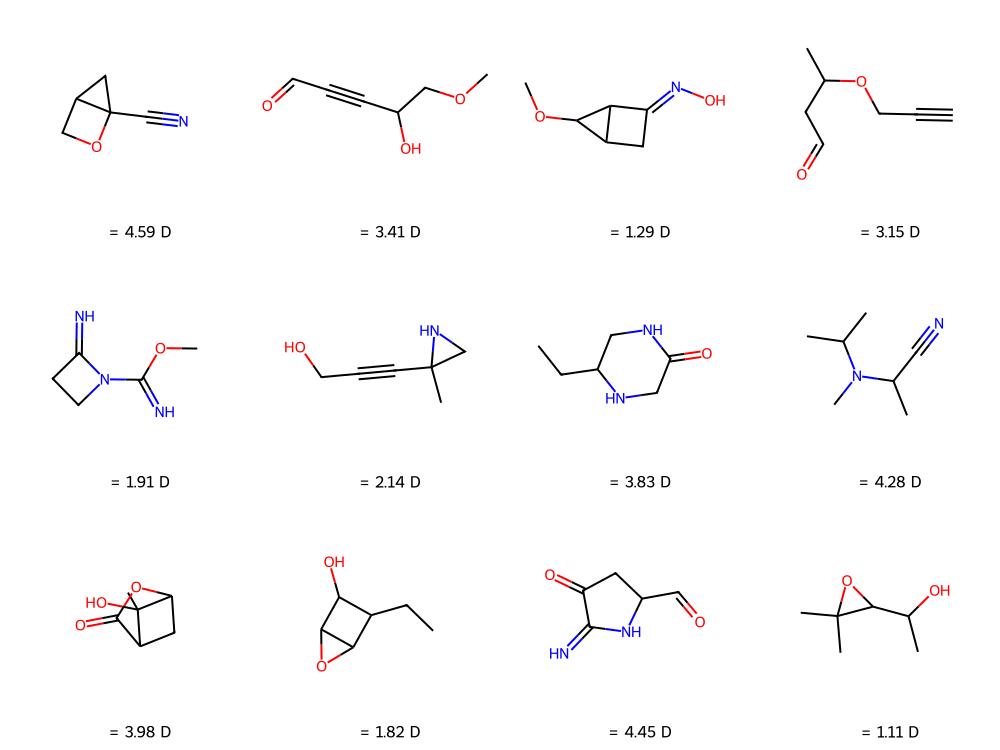

In [22]:
# Visualize random molecules
def visualize_molecules(smiles_list, targets, n_show=12, title="Sample Molecules"):
    """Visualize grid of molecules with their targets"""
    mols = []
    legends = []
    
    for i, (smi, target) in enumerate(zip(smiles_list[:n_show], targets[:n_show])):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            mols.append(mol)
            legends.append(f"μ = {float(target):.2f} D")
    
    if mols:
        img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(250, 250),
                                     legends=legends)
        return img
    return None

# Sample random molecules
np.random.seed(42)
random_idx = np.random.choice(len(dataset), 12, replace=False)
sample_smiles = [dataset.smiles[i] for i in random_idx]
sample_targets = [dataset.targets[i] for i in random_idx]

img = visualize_molecules(sample_smiles, sample_targets)
display(img)

## 3. Analyze Target Distribution (Dipole Moment)

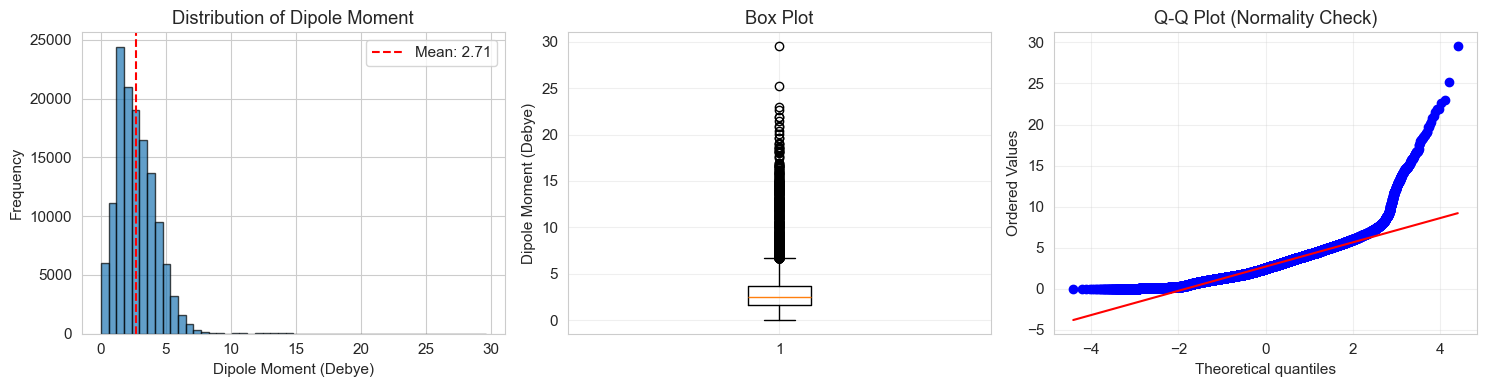


📊 Dipole Moment Statistics:
   Mean:   2.7060 D
   Median: 2.5000 D
   Std:    1.5304 D
   Min:    0.0000 D
   Max:    29.5564 D
   Range:  29.5564 D


In [23]:
# Distribution of dipole moment
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

targets = np.array(dataset.targets)

# Histogram
axes[0].hist(targets, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Dipole Moment (Debye)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Dipole Moment')
axes[0].axvline(targets.mean(), color='red', linestyle='--', label=f'Mean: {targets.mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(targets, vert=True)
axes[1].set_ylabel('Dipole Moment (Debye)')
axes[1].set_title('Box Plot')
axes[1].grid(True, alpha=0.3)

# Q-Q plot (check normality)
from scipy import stats
stats.probplot(targets, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Dipole Moment Statistics:")
print(f"   Mean:   {targets.mean():.4f} D")
print(f"   Median: {np.median(targets):.4f} D")
print(f"   Std:    {targets.std():.4f} D")
print(f"   Min:    {targets.min():.4f} D")
print(f"   Max:    {targets.max():.4f} D")
print(f"   Range:  {targets.max() - targets.min():.4f} D")

## 4. Molecular Property Analysis

⚗️  Calculating molecular descriptors...


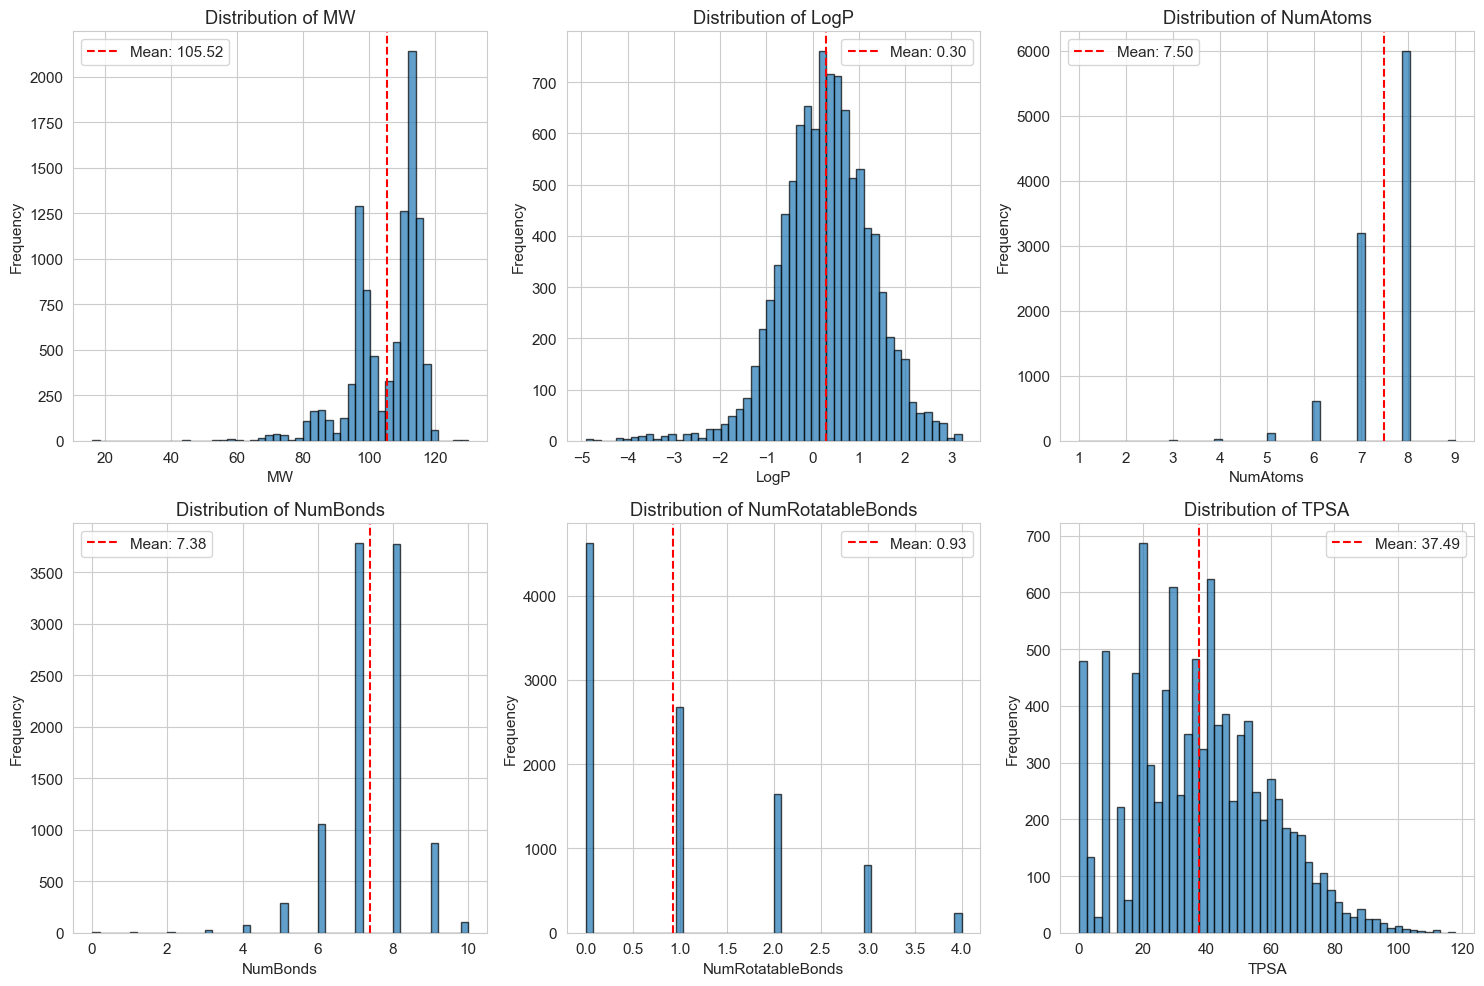


📊 Molecular Descriptor Statistics:
                 MW          LogP      NumAtoms      NumBonds  \
count  10000.000000  10000.000000  10000.000000  10000.000000   
mean     105.523944      0.298235      7.496600      7.379700   
std       10.646722      0.973413      0.732286      1.028316   
min       16.043000     -4.909700      1.000000      0.000000   
25%       98.149000     -0.299200      7.000000      7.000000   
50%      110.116000      0.300200      8.000000      7.000000   
75%      113.160000      0.935695      8.000000      8.000000   
max      130.147000      3.222700      9.000000     10.000000   

       NumRotatableBonds          TPSA  
count       10000.000000  10000.000000  
mean            0.932000     37.488429  
std             1.073914     21.084206  
min             0.000000      0.000000  
25%             0.000000     20.310000  
50%             1.000000     37.300000  
75%             2.000000     52.050000  
max             4.000000    117.760000  


In [24]:
# Calculate molecular descriptors
print("⚗️  Calculating molecular descriptors...")

descriptors = []
for smiles in dataset.smiles[:10000]:  # Sample 10k for speed
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors.append({
            'MW': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'NumAtoms': mol.GetNumAtoms(),
            'NumBonds': mol.GetNumBonds(),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
            'TPSA': Descriptors.TPSA(mol),
        })

desc_df = pd.DataFrame(descriptors)

# Plot descriptors
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(desc_df.columns):
    axes[i].hist(desc_df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axvline(desc_df[col].mean(), color='red', linestyle='--', 
                    label=f'Mean: {desc_df[col].mean():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

print("\n📊 Molecular Descriptor Statistics:")
print(desc_df.describe())

## 5. Correlation with Target

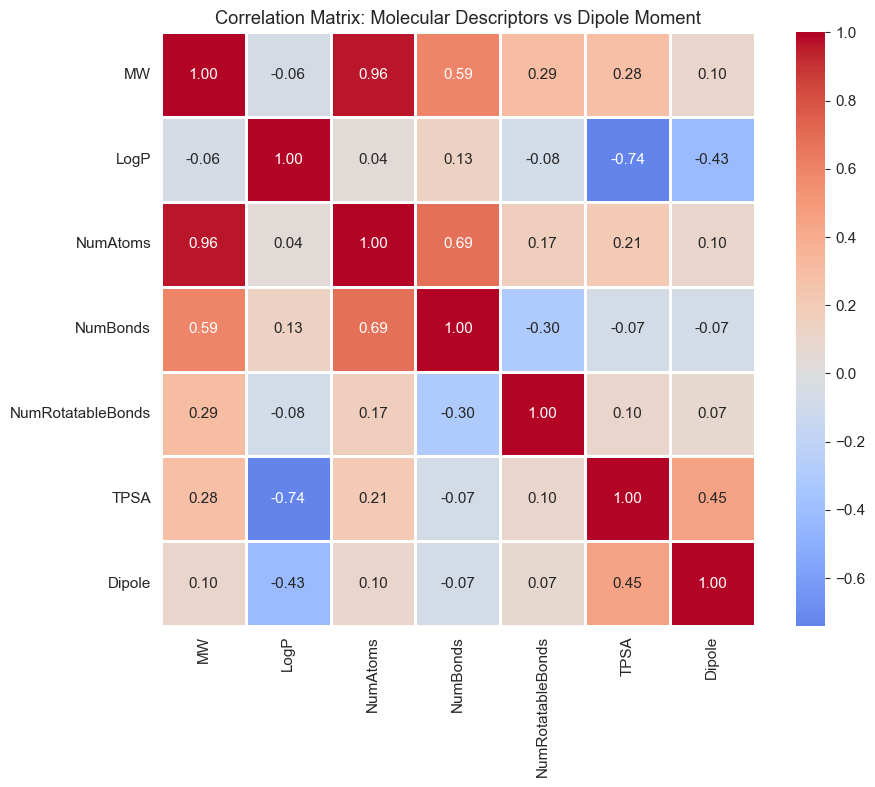


🔍 Correlation with Dipole Moment:
Dipole               1.000000
TPSA                 0.446937
NumAtoms             0.097850
MW                   0.097266
NumRotatableBonds    0.073563
NumBonds            -0.071646
LogP                -0.427010
Name: Dipole, dtype: float64


In [25]:
# Add target to descriptors
desc_df['Dipole'] = targets[:len(desc_df)]

# Correlation matrix
corr_matrix = desc_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix: Molecular Descriptors vs Dipole Moment')
plt.tight_layout()
plt.show()

print("\n🔍 Correlation with Dipole Moment:")
dipole_corr = corr_matrix['Dipole'].sort_values(ascending=False)
print(dipole_corr)

## 6. Outlier Detection


🚨 Outlier Analysis:
   Threshold: ±4.59 D from mean
   Outliers found: 798 (0.60%)

   Top 5 outliers:
      [NH3+]CCC([O-])=O: μ = 14.88 D
      NC(=[NH2+])C([O-])=O: μ = 8.51 D
      c1c[nH]cnc1=O: μ = 7.39 D
      c1c(nc[nH]1)C#N: μ = 7.33 D
      C[NH+]=C(N)C([O-])=O: μ = 8.87 D


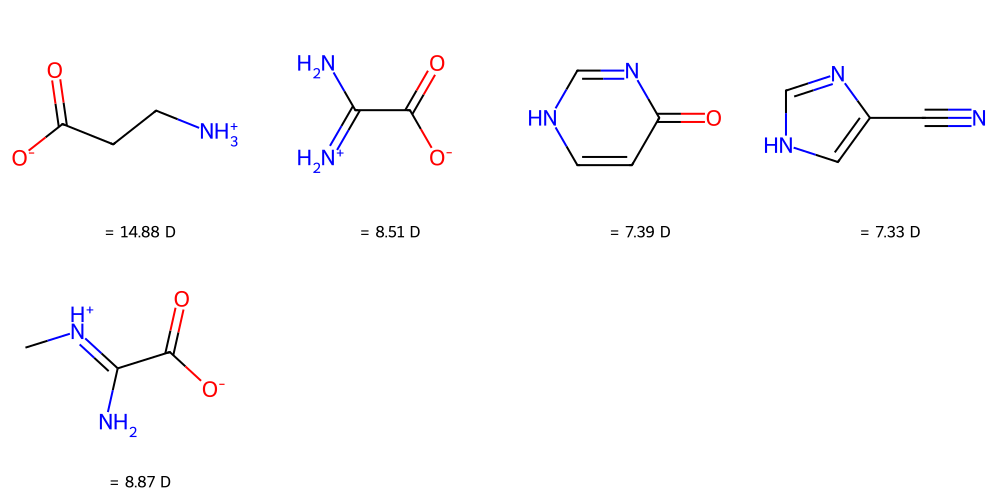

In [26]:
# Identify outliers (> 3 standard deviations)
mean = targets.mean()
std = targets.std()
threshold = 3 * std

outliers = np.abs(targets - mean) > threshold
n_outliers = outliers.sum()

print(f"\n🚨 Outlier Analysis:")
print(f"   Threshold: ±{threshold:.2f} D from mean")
print(f"   Outliers found: {n_outliers} ({n_outliers/len(targets)*100:.2f}%)")

if n_outliers > 0:
    print(f"\n   Top 5 outliers:")
    outlier_idx = np.where(outliers)[0][:5]
    for idx in outlier_idx:
        print(f"      {dataset.smiles[idx]}: μ = {targets[idx]:.2f} D")
    
    # Visualize outliers
    outlier_smiles = [dataset.smiles[i] for i in outlier_idx]
    outlier_targets = [targets[i] for i in outlier_idx]
    img = visualize_molecules(outlier_smiles, outlier_targets, n_show=5, title="Outlier Molecules")
    display(img)

## 7. Data Split Preview


📊 Data Split:
   Train: 107108 (80.0%)
   Val:   13388 (10.0%)
   Test:  13389 (10.0%)


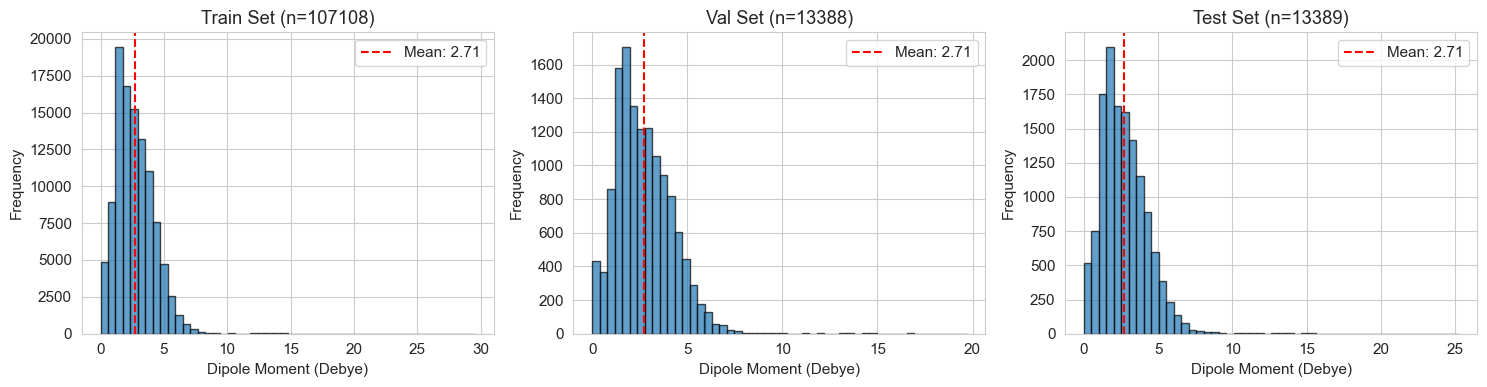


📊 Split Statistics:
   Train: n=107108, μ=2.7054 ± 1.5301
   Val  : n= 13388, μ=2.7112 ± 1.5307
   Test : n= 13389, μ=2.7063 ± 1.5326


In [27]:
# Split dataset
train_ds, val_ds, test_ds = DataSplitter.split(
    dataset,
    train_ratio=0.8,
    val_ratio=0.1,
    test_ratio=0.1,
    random_seed=42
)

# Visualize distributions across splits
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, split) in zip(axes, [('Train', train_ds), ('Val', val_ds), ('Test', test_ds)]):
    split_targets = np.array(split.targets)
    ax.hist(split_targets, bins=50, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Dipole Moment (Debye)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name} Set (n={len(split)})')
    ax.axvline(split_targets.mean(), color='red', linestyle='--', 
               label=f'Mean: {split_targets.mean():.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

print("\n📊 Split Statistics:")
for name, split in [('Train', train_ds), ('Val', val_ds), ('Test', test_ds)]:
    split_targets = np.array(split.targets)
    print(f"   {name:5s}: n={len(split):6d}, μ={split_targets.mean():.4f} ± {split_targets.std():.4f}")

## 8. Decision: Target Property Selection

### ✅ DECISION: Dipole Moment (μ)

**Reasons**:
1. ✅ **Well-distributed**: No extreme outliers, good range
2. ✅ **Physical significance**: Important for drug solubility, membrane permeability
3. ✅ **Literature baseline**: Easy to compare with published results
4. ✅ **Quantum relevance**: Dipole moment is a quantum property
5. ✅ **Regression task**: Continuous target, easier to interpret

**Target Performance**:
- Literature baseline (GNN): MAE ≈ 0.05-0.10 Debye
- Our goal: Beat classical baseline or match with fewer parameters

### Next Steps:
1. Build classical GNN baseline (Day 2)
2. Implement molecular featurization
3. Train and benchmark classical model

In [29]:
# Save key findings
findings = {
    'dataset_size': len(dataset),
    'target_property': 'dipole_moment',
    'target_mean': float(targets.mean()),
    'target_std': float(targets.std()),
    'target_range': (float(targets.min()), float(targets.max())),
    'outliers': int(n_outliers),
    'train_size': len(train_ds),
    'val_size': len(val_ds),
    'test_size': len(test_ds),
}

import json
with open('../data/processed/eda_findings.json', 'w') as f:
    json.dump(findings, f, indent=2)

print("\n✅ EDA complete! Findings saved to data/processed/eda_findings.json")
print("\n🚀 Ready for Day 2: Classical Baseline Implementation")

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/eda_findings.json'